In [2]:
# Import the neccesary libraries needed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import numpy as np
from numpy import insert
import os
import time

# keras tuner for hyperparameter tuning
import keras_tuner as kt

# tensorflow Libraries
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import sparse_categorical_crossentropy
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

Import the CSV Training and Testing Data Sets

In [3]:
# Import the csv's (IMPORTANT: You need at least 16 Gb of RAM to proceed)

# Original Dataset (002)
#train = pd.read_csv('D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\CSV_Files\\PortTraining_1404_002_FINAL_startingAt24.csv')
#test = pd.read_csv('D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\CSV_Files\\StbdTesting_1404_002_FINAL.csv')

# Deeper More Variate Dataset (038)
#train38 = pd.read_csv('D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\CSV_Files\\0001_1404.038_port.csv')
#test38 = pd.read_csv('D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\CSV_Files\\0001_1404.038_stbd.csv')


# Joint Noise Reduction Datasets
train = pd.read_csv('D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\CSV_Files\\0001_1404.038_port_FinalCleaned_RollReady.csv')
#train2 = pd.read_csv('D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\CSV_Files\\0001_1404.002_port_FinalCleaned_RollReady.csv')
test = pd.read_csv('D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\CSV_Files\\0001_1404.038_stbd_FinalCleaned_RollReady.csv')
#test2 = pd.read_csv('D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\CSV_Files\\0001_1404.002_stbd_FinalCleaned_RollReady.csv')

# 0005_1217 Dataset:
#train = pd.read_csv('D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\CSV_Files\\CSVs_0005_1217\\0005_1217_port_FinalCleaned_RollReady.csv')
#test = pd.read_csv('D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\CSV_Files\\CSVs_0005_1217\\0005_1217_stbd_FinalCleaned_RollReady.csv')

In [5]:
train

,PingNum,SampleNum,PortStbd,SampleTimeDelay,I1,Q1,I2,Q2,I3,Q3,...,I10,Q10,Roll,C,DOA,TWTT,Amplitude,AngleUncertainty,SampleRate,Range
1719881,85276,2723,0,0.041807,46.3750,-1.8125,-20.7500,40.9375,-14.0625,-60.1250,...,-46.3125,31.3125,-0.401001,1531.56,-2.514000,0.041812,116,10,65108.40625,32.018644
1719882,85276,2725,0,0.041838,-67.7500,-28.3750,88.5000,-44.3750,-49.3750,109.3750,...,136.2500,67.4375,-0.401001,1531.56,-0.702000,0.041844,131,7,65108.40625,32.043343
1719883,85276,2727,0,0.041869,384.1875,-136.0000,-200.8125,548.1875,-190.3125,-639.3750,...,-601.3750,645.3750,-0.401001,1531.56,1.110000,0.041876,148,6,65108.40625,32.068043
1719884,85276,2729,0,0.041899,131.4375,-61.5625,-87.2500,240.0625,-47.3125,-256.5000,...,-9.4375,0.7500,-0.401001,1531.56,2.292000,0.041902,161,7,65108.40625,32.088037
1719885,85276,2730,0,0.041915,-3.5625,185.7500,-178.2500,-151.9375,266.8750,28.3125,...,-25.4375,-377.6250,-0.401001,1531.56,2.568000,0.041919,158,10,65108.40625,32.100975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14213958,88251,6499,0,0.099803,-5.7500,11.8750,10.2500,16.7500,7.6250,-10.0000,...,-26.1250,-5.6250,-1.395264,1531.17,80.454001,0.099801,150,10,65108.40625,76.406335
14213959,88251,6500,0,0.099818,-23.2500,-16.2500,-20.0000,11.5000,-10.0000,15.3750,...,4.5000,-8.6250,-1.395264,1531.17,80.478001,0.099817,149,17,65108.40625,76.418094
14213960,88251,6501,0,0.099833,-24.8750,-31.7500,-41.8750,-1.2500,-21.1250,39.1250,...,35.3750,-11.1250,-1.395264,1531.17,80.478001,0.099832,148,17,65108.40625,76.429853
14213961,88251,6502,0,0.099849,-6.7500,-18.1250,-22.5000,-3.7500,-8.3750,32.0000,...,29.5000,-7.3750,-1.395264,1531.17,80.442001,0.099847,149,16,65108.40625,76.441611


In [6]:
test

,PingNum,SampleNum,PortStbd,SampleTimeDelay,I1,Q1,I2,Q2,I3,Q3,...,I10,Q10,Roll,C,DOA,TWTT,Amplitude,AngleUncertainty,SampleRate,Range
1716044,85276,2724,1,0.041823,-5.0000,-24.7500,33.5000,10.5625,-26.5000,3.5625,...,-19.9375,45.3750,-0.401001,1531.56,-3.342000,0.041819,127,13,65108.40625,32.024525
1716045,85276,2725,1,0.041838,44.0000,25.1875,-48.2500,17.5625,49.4375,-64.1875,...,-80.2500,-121.5000,-0.401001,1531.56,-2.328000,0.041844,142,9,65108.40625,32.043343
1716046,85276,2726,1,0.041853,-52.6875,164.6250,-120.6875,-165.5000,235.6875,68.0000,...,148.1250,-235.4375,-0.401001,1531.56,-2.118000,0.041861,153,10,65108.40625,32.056281
1716047,85276,2729,1,0.041899,-325.5000,-46.6250,359.9375,-302.0625,-134.7500,509.0000,...,462.1250,-26.0000,-0.401001,1531.56,-0.162000,0.041895,157,11,65108.40625,32.082157
1716048,85276,2730,1,0.041915,-271.0625,156.5000,104.9375,-396.8750,150.4375,404.9375,...,282.5625,-167.8125,-0.401001,1531.56,0.864000,0.041919,154,11,65108.40625,32.100975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14340274,88251,6499,1,0.099803,11.6250,-9.7500,-4.2500,-19.7500,-28.8750,-1.0000,...,-15.8750,34.5000,-1.395264,1531.17,78.336001,0.099801,146,28,65108.40625,76.406335
14340275,88251,6500,1,0.099818,-7.6250,-11.3750,-11.8750,5.3750,-1.3750,22.3750,...,10.8750,19.2500,-1.395264,1531.17,77.862001,0.099817,148,27,65108.40625,76.418094
14340276,88251,6501,1,0.099833,-8.0000,-11.5000,-10.8750,8.0000,3.1250,15.2500,...,19.2500,7.1250,-1.395264,1531.17,77.952001,0.099832,150,16,65108.40625,76.429853
14340277,88251,6502,1,0.099849,14.0000,-23.7500,-5.2500,-22.0000,-18.7500,-13.6250,...,-5.3750,30.6250,-1.395264,1531.17,78.084001,0.099847,151,11,65108.40625,76.441611


In [4]:
#remove first X pings from train & test
X_to_remove = 500
startPingNumTrain = train['PingNum'].min()
startPingNumTest = test['PingNum'].min()
train = train[train.PingNum >= startPingNumTrain + X_to_remove ]
test = test[test.PingNum >= startPingNumTest + X_to_remove ]

Split up the Features and Labels from both the Training and Testing Datasets

In [4]:
# Split up the features and labels from both the training and testing datasets
#x_train=train.iloc[:,4:24]

#x_train=train.iloc[:,3:24] # sample time delay through Q10

x_train1=train.iloc[:,3:25] # sample time delay through roll
#x_train2 = train2.iloc[:, 3:25]
#x_train=train38.iloc[:,3:24]

x_train1['Amplitude']=train.iloc[:,29]
#x_train2['Amplitude']=train2.iloc[:,29]
#x_train['Amplitude']=train38.iloc[:,29]


#x_test=test.iloc[:,4:24]
#x_test=test.iloc[:,3:24]    # sample time delay through Q10

x_test=test.iloc[:,3:25]    # sample time delay through roll
#x_test2=test2.iloc[:,3:25]    # sample time delay through roll
#x_test['Roll'] = x_test['Roll']


x_test['Amplitude']=test.iloc[:,29]
#x_test2['Amplitude']=test2.iloc[:,29]
#x_test['Amplitude']=test38.iloc[:,29]

y_train1Seq=train.iloc[:,26]
#y_train2Seq=train2.iloc[:,26]
y_train1 = pd.DataFrame(y_train1Seq)
#y_train2 = pd.DataFrame(y_train2Seq)
#y_train=train38.iloc[:,26]

y_testSeq=test.iloc[:,26]
y_test = pd.DataFrame(y_testSeq)
#y_test2Seq=test2.iloc[:,26]
#y_test2 = pd.DataFrame(y_test2Seq)
#y_test=test38.iloc[:,26]

In [5]:
#xframes = [x_train1, x_train2]
xframes = [x_train1]
x_train = pd.concat(xframes, sort=False)
#yframes = [y_train1Seq, y_train2Seq]
yframes = [y_train1Seq]
y_trainSeq = pd.concat(yframes, sort=False)
#y_train.columns=['DOA']
y_train = pd.DataFrame(y_trainSeq)

#val_xframes = [x_test, x_test2]
val_xframes = [x_test]
val_xtest = pd.concat(val_xframes, sort=False)
#val_yframes = [y_test, y_test2]
val_yframes = [y_test]
val_ytestSeq = pd.concat(val_yframes, sort=False)
val_ytest = pd.DataFrame(val_ytestSeq)
#val_ytest.columns=['DOA']

In [ ]:
type(y_train)

In [ ]:
print(y_test)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train
print(y_train.shape)

#y_traindf = y_train['DOA']
#print(y_traindf.shape)

Scale the Features from -1 to 1 so that Training is Easier for the Model ( Joint Train )

In [8]:
# Scale the Features and Labels from [-1,1]

s1=MinMaxScaler(feature_range=(0,1))

#s1=MinMaxScaler(feature_range=(0,1))
x_train_scale=s1.fit_transform(x_train)     # fit transformation bounds on train data, scale train X to fit bounds...

#s2=MinMaxScaler(feature_range=(0,1))
#s2=MinMaxScaler(feature_range=(0,1))


x_val_scale=s1.transform(val_xtest) #scale validation X to bounds...
x_val_scale=x_val_scale
x_val_scale[:, 21] = -x_val_scale[:, 21] # invert roll direction since this is both stbd datasets
#y_val_scale = val_ytest.to_numpy()          # validation Y to numpy...


x_test_scale=s1.transform(x_test)   #scale test X to bounds...
x_test_scale=x_test_scale
# 
x_test_scale[:, 21] = -x_test_scale[:, 21]

#x_test2_scale=s1.transform(x_test2)
#x_test2_scale[:, 21] = -x_test2_scale[:, 21]

# Scale DOA's from (0 to 1)
s2=MinMaxScaler(feature_range=(0,1))
#y_train_scale=s2.fit_transform(y_train)
y_train_scale= y_train.to_numpy()
#y_val_scale = s2.transform(val_ytest)
y_val_scale = val_ytest.to_numpy()
#y_test_scale =s2.transform(y_test)
y_test_scale = y_test.to_numpy()
#y_test2_scale=s2.transform(y_test2)



# separate training sets for additional/suplemental training...
#x_train002_scale=s1.transform(x_train2)
#x_train038_scale=s1.transform(x_train1)
#y_train002_scale=s2.transform(y_train2)
#y_train038_scale=s2.transform(y_train1)
x_train038_scale=x_train.to_numpy()
y_train038_scale=y_train.to_numpy()



#y_train_scale=s2.fit_transform(y_train[['DOA']])
#y_val_scale = s2.transform(val_ytest[['DOA']])
#y_test_scale =s2.transform(y_test[['DOA']])
#y_test2_scale=s2.transform(y_test2[['DOA']])

#s3=MinMaxScaler(feature_range=(0,1))
#y_train_scale = s3.fit_transform(train[['DOA']])
#y_train_scale= y_train.to_numpy()

#s4=MinMaxScaler(feature_range=(0,1))
#y_test_scale = s4.fit_transform(test[['DOA']])
#y_test_scale = y_test.to_numpy()
#y_test2_scale = y_test2.to_numpy()
print(len(x_train_scale))
print(len(y_train_scale))

3635099
3635099


Scale the Features from -1 to 1 so that Training is Easier for the Model ( 038 Train )

In [ ]:
# Scale the Features and Labels from [-1,1]

s1=MinMaxScaler(feature_range=(0,1))
#s1=MinMaxScaler(feature_range=(0,1))
x_train_scale=s1.fit_transform(x_train1)

#s2=MinMaxScaler(feature_range=(0,1))
#s2=MinMaxScaler(feature_range=(0,1))
x_test_scale=s1.transform(x_test)
x_test_scale=x_test_scale
x_test_scale[:, 21] = -x_test_scale[:, 21]
x_test2_scale=s1.transform(x_test2)
x_test2_scale[:, 21] = -x_test2_scale[:, 21]

# Scale DOA's from (0 to 1)
#s3=MinMaxScaler(feature_range=(0,1))
#y_train_scale = s3.fit_transform(train[['DOA']])
y_train_scale= y_train1.to_numpy()

#s4=MinMaxScaler(feature_range=(0,1))
#y_test_scale = s4.fit_transform(test[['DOA']])
y_test_scale = y_test.to_numpy()
y_test2_scale = y_test2.to_numpy()
print(len(x_train_scale))
print(len(y_train_scale))

In [ ]:
x_train_scale

In [ ]:
x_train_scale[:,21]

In [ ]:
x_test_scale[:,21]

In [ ]:
y_train_scale

In [ ]:
Test_DOA_df= pd.DataFrame(y_test_scale, columns=['TEST DOAs'])
Test_DOA_df


In [ ]:
Test_DOA_df.describe()

In [ ]:
df= pd.DataFrame(x_train_scale, columns= ['TWTT','I1', 'Q1', 'I2', 'Q2', 'I3', 'Q3', 'I4', 'Q4', 'I5', 'Q5', 'I6', 'Q6', 'I7', 'Q7', 'I8', 'Q8', 'I9', 'Q9', 'I10', 'Q10','Roll', 'Amplitude'])
df


In [ ]:
df.describe()

Shift the DOA's to the Left by one so that the Current I and Q data Align with the current DOA while using TimeSeriesGenerator to Window the Data

In [9]:
# Shift the DOA to the left by one to use the current DOA label with the current I and Q data.
# Normally the TimeseriesGenerator function uses past values to predict the future but we would like current data to help predict the current samples' DOA
print(len(y_train_scale))
print(len(y_test_scale))
y_train_scale=insert(y_train_scale, 0, 0)   # shift combined 002 & 038 port by 1
y_train_scale=np.delete(y_train_scale, -1)  #

#y_train002_scale=insert(y_train002_scale, 0,0)
#y_train002_scale=np.delete(y_train002_scale, -1)
y_train038_scale=insert(y_train038_scale, 0,0)
y_train038_scale=np.delete(y_train038_scale, -1)



y_test_scale=insert(y_test_scale, 0,0)      # shift 038 stbd by 1
y_test_scale=np.delete(y_test_scale, -1)    #

#y_test2_scale=insert(y_test2_scale, 0,0)    # shift 002 stbd by 1
#y_test2_scale=np.delete(y_test2_scale, -1)  #

y_val_scale=insert(y_val_scale, 0, 0)       # shift validation set by 1
y_val_scale=np.delete(y_val_scale, -1)      #

print(y_train_scale)
print(len(y_train_scale))
print(y_test_scale)
print(len(y_test_scale))

3635099
3382112
[ 0.00000000e+00 -3.05400003e+00 -5.40000005e-02 ...  7.36260006e+01
  7.36260006e+01  7.35780006e+01]
3635099
[ 0.          3.69000003  2.39400002 ... 76.59600067 76.35000066
 76.32600066]
3382112


Create the Windows Neccesary for the LSTM model using the TimeSeriesGenerator Function

In [10]:
# Create the windows neccesary for the LSTM model within tensorflow keras
# Below are the arguments of the timeseries_dataset_from_array function
# The function takes a numpy array and makes a timeseries out of it
NumSampsPerPing= 4301-24+1
data=x_train_scale # the data to make the windows
targets=y_train_scale # time steps in the data (don't need)
sequence_length=5 # window length
sequence_stride=1# period between successive output sequences
sampling_rate=1 # period between successive individual timesteps     within sequences
batch_size=8 # number of time series samples in each batch
shuffle=False #shuffle the data before making the windows
seed=None # is related to shuffle
start_index=None # is related to shuffle
end_index=None # is related to shuffle
n_features=23

test_data=x_test_scale
test_targets=y_test_scale
#test2_data = x_test2_scale
#test2_targets = y_test2_scale
dataRows = data.shape[0]
dataRows

3635099

In [13]:
val_data = x_val_scale
val_targets = y_val_scale


In [11]:
#validationStartRow = dataRows - NumSampsPerPing*281
validationStartRow = dataRows - 200*1000
#validationStartRow = dataRows - 8*1000

print(validationStartRow, ',',dataRows)

#train_data = data[:validationStartRow-1]
train_data = data
#   train_data.shape[0]
#train_targets = targets[:validationStartRow-1]
train_targets = targets
#   train_targets.shape[0]
#val_data = data[validationStartRow:]
#   val_data.shape[0], dataRows-validationStartRow
#y_val_scale = y_train_scale[validationStartRow:]

#val_targets = targets[validationStartRow:]

3435099 , 3635099


In [ ]:
train_data.shape , train_targets.shape

In [ ]:
val_data.shape , val_targets.shape

In [14]:


#inputs=TimeseriesGenerator(data, targets,sequence_length, batch_size)
train_inputs=TimeseriesGenerator(data=train_data,targets=train_targets,length=sequence_length,sampling_rate=sampling_rate,stride=sequence_stride,batch_size=batch_size, shuffle=True)
trainentire_inputs = TimeseriesGenerator(data=data,targets=targets,length=sequence_length,sampling_rate=sampling_rate,stride=sequence_stride,batch_size=1024)

#train002_inputs=TimeseriesGenerator(data=x_train002_scale,targets=y_train002_scale,length=sequence_length,sampling_rate=sampling_rate,stride=sequence_stride,batch_size=batch_size, shuffle=True)
train038_inputs=TimeseriesGenerator(data=x_train038_scale,targets=y_train038_scale,length=sequence_length,sampling_rate=sampling_rate,stride=sequence_stride,batch_size=batch_size, shuffle=True)


val_inputs = TimeseriesGenerator(data=val_data,targets=val_targets,length=sequence_length,sampling_rate=sampling_rate,stride=sequence_stride,batch_size=1024, shuffle=False)

#test_inputs=TimeseriesGenerator(test_data[0:40000], -1*test_targets[0:40000],sequence_length, batch_size)
test_inputs=TimeseriesGenerator(data=test_data,targets=test_targets,length=sequence_length,sampling_rate=sampling_rate,stride=sequence_stride,batch_size=1024)
#test_inputs2=TimeseriesGenerator(data=test2_data,targets=test2_targets,length=sequence_length,sampling_rate=sampling_rate,stride=sequence_stride,batch_size=1024)

#inputs=tf.keras.preprocessing.timeseries_dataset_from_array(data, targets, sequence_length, sequence_stride, sampling_rate, batch_size, shuffle)
#print(type(inputs))

#print('done')

In [ ]:
# abstraction test imports
abstraction_test_port = pd.read_csv('D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\CSV_Files\\0001_1404.038_port.csv')
abstraction_test_stbd = pd.read_csv('D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\CSV_Files\\0001_1404.038_stbd.csv')
# Split up the features and labels from both the training and testing datasets
#x_train=train.iloc[:,4:24]

Xatest_port=abstraction_test_port.iloc[:,3:24]
#x_train['TWTT']=train.iloc[:,28]  I feel as though the TWTT has NO impact on the DOA so we should NOT include it in training
Xatest_port['Amplitude']=abstraction_test_port.iloc[:,29]


#x_test=test.iloc[:,4:24]
Xatest_stbd=abstraction_test_stbd.iloc[:,3:24]
#x_test['TWTT']=test.iloc[:,28] I feel as though the TWTT has NO impact on the DOA so we should NOT include it in training
Xatest_stbd['Amplitude']=abstraction_test_stbd.iloc[:,29]

Yatest_port=abstraction_test_port.iloc[:,26]

Yatest_stbd=abstraction_test_stbd.iloc[:,26]

s10=MinMaxScaler(feature_range=(0,1))
#s1=MinMaxScaler(feature_range=(0,1))
Xatest_port_scale=s10.fit_transform(Xatest_port)

s20=MinMaxScaler(feature_range=(0,1))
#s2=MinMaxScaler(feature_range=(0,1))
Xatest_stbd_scale=s20.fit_transform(Xatest_stbd)
#x_test_scale=x_test_scale

# Scale DOA's from (0 to 1)
s30=MinMaxScaler(feature_range=(0,1))
#y_train_scale = s3.fit_transform(train[['DOA']])
Yatest_port_scale= Yatest_port.to_numpy()

s40=MinMaxScaler(feature_range=(0,1))
#y_test_scale = s4.fit_transform(test[['DOA']])
Yatest_stbd_scale= Yatest_stbd.to_numpy()

print(len(Xatest_port_scale))
print(len(Xatest_stbd_scale))

print(len(Yatest_port_scale))
print(len(Yatest_stbd_scale))
Yatest_port_scale=insert(Yatest_port_scale, 0, 0)
Yatest_port_scale=np.delete(Yatest_port_scale, -1)
Yatest_stbd_scale=insert(Yatest_stbd_scale, 0,0)
Yatest_stbd_scale=np.delete(Yatest_stbd_scale, -1)
print(Yatest_port_scale)
print(len(Yatest_port_scale))
print(Yatest_stbd_scale)
print(len(Yatest_stbd_scale))


abstraction_test_port_inputs=TimeseriesGenerator(data=Xatest_port_scale,targets=Yatest_port_scale,length=sequence_length,sampling_rate=sampling_rate,stride=sequence_stride,batch_size=batch_size)
abstraction_test_stbd_inputs=TimeseriesGenerator(data=Xatest_stbd_scale,targets=Yatest_stbd_scale,length=sequence_length,sampling_rate=sampling_rate,stride=sequence_stride,batch_size=batch_size)




In [ ]:
# print the first couple of samples to see if everything is lining up
for i in range(100):
	x, y = train_inputs[i]
	print('%s => %s' % (x, y))

In [ ]:
# print the first couple of samples to see if everything everything is lining up
for i in range(100):
	x, y = test_inputs[i]
	print('%s => %s' % (x, y))

Define the Model's Structure

In [14]:
# clear the model!
model = 0

In [15]:
# With all the preproccessing done, it is time to define the model
# Define the LSTM Model
model= Sequential(name='MLDOASequential')
model.add(LSTM(units=192, name='LSTM1', activation='tanh', input_shape=(sequence_length,n_features), return_sequences=True))
model.add(LSTM(units=192, name='LSTM2', activation='tanh', input_shape=(sequence_length,n_features), return_sequences=False))
#model.add(LSTM(units=44, name='LSTM1', activation='tanh', input_shape=(sequence_length,n_features), return_sequences=False))

#model.add(LSTM(units=64, name='LSTM1', activation='tanh', batch_input_shape=(batch_size, sequence_length, n_features),input_shape=(sequence_length,n_features), return_sequences=True, stateful=False, bias_initializer='ones'))
#model.add(LSTM(units=64, name='LSTM1', activation='tanh', input_shape=(sequence_length,n_features), return_sequences=True, stateful=False, bias_initializer='Ones'))
#model.add(Dense(units=))
#model.add(Dense(units=300, name='Dense1', activation = 'relu'))
#model.add(Dropout(0.2, name='Dropout1'))

#model.add(LSTM(units=416, name='LSTM2', activation='tanh', return_sequences=True, stateful=False, bias_initializer='ones'))
#model.add(Dense(units=500, name='Dense2'))
#model.add(Dense(units=100, activation='relu'))
#model.add(Dropout(0.1, name='Dropout2'))

#model.add(LSTM(units=312, name='LSTM3', activation='tanh', return_sequences=False, stateful=False, bias_initializer='Ones'))
#model.add(Dense(units=300, name='Dense3', activation='relu'))

#model.add(Dropout(0.3, name='Dropout1'))

#model.add(Dense(units=10, name='Dense4', activation='relu', input_shape=(sequence_length,n_features)))
model.add(Dense(units=192, name='Dense1', activation='relu'))
#model.add(Dropout(0.2, name='Dropout2'))
model.add(Dense(units=192, name='Dense2', activation='relu'))
#model.add(Dropout(0.3, name='Dropout3'))
#model.add(Dense(units=96, name='Dense3', activation='relu'))
#model.add(Dropout(0.2, name='Dropout3'))
#model.add(Dense(units=30, name='Dense4', activation='relu'))
#model.add(Dropout(0.2, name='Dropout4'))
#model.add(Dense(units=30, name='Dense5', activation='relu'))
#model.add(Dropout(0.2, name='Dropout5'))
#model.add(Dense(units=10, name='Dense9', activation='relu'))
#model.add(Dropout(0.2, name='Dropout6'))
#model.add(LSTM(units=84, name='LSTM3', activation='tanh', return_sequences=True))
#model.add(Dense(units=100))
#model.add(Dense(units=100, activation = 'linear'))
#model.add(Dropout(0.2))
#model.add(LSTM(units=320, activation='tanh', return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(units=168, name='LSTM4', activation='tanh'))
#model.add(Dense(units=100))
#model.add(Dense(units=100, activation = 'linear'))
#model.add(Dropout(0.2))
#model.add(LSTM(units=480))
#model.add(Dropout(0.2))


model.add(Dense(units=1, name='DenseOutput', activation='linear')) #one output (namely: DOA)



In [15]:
# With all the preproccessing done, it is time to define the model
# Define the LSTM Model
model= Sequential(name='MLDOASequential')
# Add the LSTM Layers, (Last one must have return_sequences=False)
model.add(LSTM(units=96, name='LSTM1', activation='tanh', input_shape=(sequence_length,n_features), return_sequences=True))
model.add(LSTM(units=96, name='LSTM2', activation='tanh', input_shape=(sequence_length,n_features), return_sequences=False))
# Add Dense Layers to learn towards DOA output from LSTM outputs
model.add(Dense(units=96, name='Dense1', activation='relu'))
model.add(Dense(units=96, name='Dense2', activation='relu'))
model.add(Dense(units=96, name='Dense3', activation='relu'))
# Add output Dense Layer
model.add(Dense(units=1, name='DenseOutput', activation='linear'))
# print out each layer of the model to validate it 
model.summary()

Model: "MLDOASequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 5, 96)             46080     
                                                                 
 LSTM2 (LSTM)                (None, 96)                74112     
                                                                 
 Dense1 (Dense)              (None, 96)                9312      
                                                                 
 Dense2 (Dense)              (None, 96)                9312      
                                                                 
 Dense3 (Dense)              (None, 96)                9312      
                                                                 
 DenseOutput (Dense)         (None, 1)                 97        
                                                                 
Total params: 148,225
Trainable params: 148,225
Non

In [16]:
model.summary()

Model: "MLDOASequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 36, 192)           165888    
                                                                 
 LSTM2 (LSTM)                (None, 192)               295680    
                                                                 
 Dense1 (Dense)              (None, 192)               37056     
                                                                 
 Dense2 (Dense)              (None, 192)               37056     
                                                                 
 DenseOutput (Dense)         (None, 1)                 193       
                                                                 
Total params: 535,873
Trainable params: 535,873
Non-trainable params: 0
_________________________________________________________________


Train the Model using the Specified Hyperparmeters

In [16]:
# epoch learning rate scheduler for 10 epochs.
def EpochScheduler10_2(epoch, lr):
    if epoch == 0:
        return 0.1
    if epoch == 1:
        return 0.1
    elif epoch == 2:
        return 0.1
    elif epoch == 3:
        return 0.05
    elif epoch == 4:
        return 0.05
    elif epoch == 5:
        return 0.05
    elif epoch == 6:
        return 0.025
    elif epoch == 7:
        return 0.025
    elif epoch == 8:
        return 0.025
    elif epoch == 9:
        return 0.01
    elif epoch == 10:
        return 0.01
    elif epoch == 11:
        return 0.01
    else:
        return 0.01


In [17]:
# epoch learning rate scheduler for 10 epochs.
def EpochScheduler10(epoch, lr):
    if epoch == 0:
        return 0.01
    if epoch == 1:
        return 0.01
    elif epoch == 2:
        return 0.01
    elif epoch == 3:
        return 0.005
    elif epoch == 4:
        return 0.005
    elif epoch == 5:
        return 0.005
    elif epoch == 6:
        return 0.0025
    elif epoch == 7:
        return 0.0025
    elif epoch == 8:
        return 0.0025
    elif epoch == 9:
        return 0.001
    elif epoch == 10:
        return 0.001
    elif epoch == 11:
        return 0.001
    else:
        return 0.001


In [18]:
def scheduler(epoch,lr):
    if epoch<=1:
        return lr
    elif epoch>=2 | epoch<=4:
        #return lr/1.65
        return lr/1.55
    else:
        #return lr * tf.math.exp(-0.5)
        return lr * tf.math.exp(-0.2)

In [ ]:
#Now it is time to train the model
#opt=tf.keras.optimizers.Adam(learning_rate=0.00007)#,decay=1e-5)
opt=tf.keras.optimizers.Adam(learning_rate=0.003)#,decay=1e-5)
#opt = tf.keras.optimizers.Adam()
mMSE = tf.keras.metrics.MeanSquaredError()     # metric for Mean Squared Error
mRMSE = tf.keras.metrics.RootMeanSquaredError()
huberLoss = tf.keras.losses.Huber(delta=12)
#model.compile(loss='mse', optimizer=opt, metrics=[mMSE, mRMSE])
#model.compile(loss=huberLoss, optimizer=opt, metrics=[mMSE, mRMSE])
model.compile(loss='mae', optimizer=opt, metrics=[mMSE, mRMSE])

# Allow for early stopping so that the model does not overfit the training dataset
es= EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=10)
#es= EarlyStopping(monitor='loss', mode='min',verbose=1,patience=10)
# change learning rates per epoch
lrCallback = tf.keras.callbacks.LearningRateScheduler(EpochScheduler10_2)
sc = tf.keras.callbacks.LearningRateScheduler(scheduler)
# Model Checkpoint to save good runs
cp = ModelCheckpoint('model/', save_best_only=True)
#cp = ModelCheckpoint('model/', monitor='loss',save_best_only=True)

t0=time.time()
#history= model.fit(inputs,steps_per_epoch=4000,epochs=200,verbose=1, callbacks=[es])
#history= model.fit(train_inputs, steps_per_epoch=4000, validation_data=val_inputs, epochs=100, callbacks=[lrCallback, cp])
#history= model.fit(train_inputs, epochs=1, batch_size=None,callbacks=[cp, es])
#history= model.fit(train_inputs, epochs=75, steps_per_epoch=1782, validation_steps=10720,validation_data=val_inputs, batch_size=None,callbacks=[cp])
#history= model.fit(train_inputs, epochs=15,validation_data=val_inputs, batch_size=None,callbacks=[cp, sc])

#history = model.fit(train_inputs, epochs = 60, steps_per_epoch = 1500, validation_data=val_inputs, batch_size=None,callbacks=[cp, es])
#history = model.fit(train_inputs, epochs = 15, steps_per_epoch = 5000, batch_size=None,callbacks=[cp, es, sc])
history = model.fit(train_inputs, epochs = 150, steps_per_epoch = 10000, batch_size=None, validation_data=val_inputs,callbacks=[cp, es, sc])

t1=time.time()
print("The total run time to train was %.2f seconds"%(t1-t0))

# plot the loss function


In [19]:
#Now it is time to train the model
opt=tf.keras.optimizers.Adam(learning_rate=0.01)#,decay=1e-5)
mMSE = tf.keras.metrics.MeanSquaredError()
mRMSE = tf.keras.metrics.RootMeanSquaredError()
huberLoss = tf.keras.losses.Huber(delta=10)
# Compile Model with specified settings
model.compile(loss=huberLoss, optimizer=opt, metrics=[mMSE, mRMSE])
# Allow for early stopping so that the model does not overfit the training dataset
es= EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=10)
# change learning rates per epoch
sc = tf.keras.callbacks.LearningRateScheduler(scheduler)
# Model Checkpoint to save good runs
cp = ModelCheckpoint('model/', save_best_only=True)
t0=time.time()
# Start Training
history = model.fit(train_inputs, epochs = 15, steps_per_epoch = 5000, batch_size=None, \
    validation_data=val_inputs,callbacks=[cp, es, sc])
t1=time.time()
print("The total run time to train was %.2f seconds"%(t1-t0))
# plot the loss function
plt.figure()
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
#plt.semilogy(history.history['lr'])
plt.xlabel('epoch'); plt.ylabel('loss')

Epoch 1/15
4996/5000 [============================>.] - ETA: 0s - loss: 31.0220 - mean_squared_error: 100.9711 - root_mean_squared_error: 10.0484

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


5000/5000 [==============================] - 189s 37ms/step - loss: 30.9983 - mean_squared_error: 100.8926 - root_mean_squared_error: 10.0445 - val_loss: 2.6504 - val_mean_squared_error: 8.1557 - val_root_mean_squared_error: 2.8558 - lr: 0.0100
Epoch 2/15
4998/5000 [============================>.] - ETA: 0s - loss: 2.6184 - mean_squared_error: 6.7638 - root_mean_squared_error: 2.6007

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


5000/5000 [==============================] - 178s 36ms/step - loss: 2.6196 - mean_squared_error: 6.7656 - root_mean_squared_error: 2.6011 - val_loss: 2.0727 - val_mean_squared_error: 4.5864 - val_root_mean_squared_error: 2.1416 - lr: 0.0100
Epoch 3/15
4999/5000 [============================>.] - ETA: 0s - loss: 1.5521 - mean_squared_error: 3.4583 - root_mean_squared_error: 1.8596

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


5000/5000 [==============================] - 180s 36ms/step - loss: 1.5519 - mean_squared_error: 3.4578 - root_mean_squared_error: 1.8595 - val_loss: 0.9637 - val_mean_squared_error: 2.0028 - val_root_mean_squared_error: 1.4152 - lr: 0.0065
Epoch 4/15
1285/5000 [======>.......................] - ETA: 1:43 - loss: 1.0240 - mean_squared_error: 2.1427 - root_mean_squared_error: 1.4638

Text(0, 0.5, 'loss')

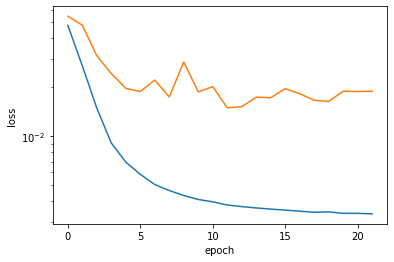

In [22]:
plt.figure()
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
#plt.semilogy(history.history['lr'])
plt.xlabel('epoch'); plt.ylabel('loss')


In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.003)#,decay=1e-5)
#opt = tf.keras.optimizers.Adam()
mMSE = tf.keras.metrics.MeanSquaredError()     # metric for Mean Squared Error
mRMSE = tf.keras.metrics.RootMeanSquaredError()
huberLoss = tf.keras.losses.Huber(delta=12)
#model.compile(loss='mse', optimizer=opt, metrics=[mMSE, mRMSE])
#model.compile(loss=huberLoss, optimizer=opt, metrics=[mMSE, mRMSE])
model.compile(loss='mae', optimizer=opt, metrics=[mMSE, mRMSE])
history = model.fit(train038_inputs, epochs = 15, steps_per_epoch = 20000, batch_size=None, validation_data=val_inputs,callbacks=[cp, es, sc])

In [ ]:
tf.keras.models.save_model(model, filepath="D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\SavedModels\\MB\\Mar10_2022\\model_row43.h5")

In [ ]:
model = keras.models.load_model('model/')
#model = keras.models.load_model('model_3_13_22_epoch4/model/')
#model = keras.models.load_model(filepath="D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\SavedModels\\MB\\Mar10_2022\\model_row12.h5")

In [ ]:
#trainpredicted=model.predict(train_inputs, verbose=1)
#valpredicted=model.predict(val_inputs, verbose=1)
#trainentirepredicted=model.predict(trainentire_inputs, verbose=1)
predicted038=model.predict(test_inputs, verbose=1)
predicted002=model.predict(test_inputs2, verbose=1)
#trainpredicted.shape, valpredicted.shape, predicted.shape, trainentirepredicted.shape

In [ ]:
trainentirepredicted=model.predict(trainentire_inputs, verbose=1)

In [ ]:
predicted.shape, trainentirepredicted.shape

In [ ]:
port_abstraction_test_predicted=model.predict(abstraction_test_port_inputs, verbose=1)

In [ ]:
Yatest_port_scale
#val_targets
plt.figure(facecolor='white')
plt.plot(Yatest_port_scale[0:4278*3])
plt.plot(port_abstraction_test_predicted[0:4278*3])
plt.title("Port Abstraction Test (Actual vs. Predicted)")
plt.xlabel('Samples')
plt.ylabel('DOA in degrees')
plt.legend(['Actual','Predicted'])
plt.show()

In [ ]:
trainpredicted.shape, valpredicted.shape,trainpredicted.shape[0]+valpredicted.shape[0], predicted.shape, trainentirepredicted.shape

In [ ]:
predicted=model.predict(test_inputs, verbose=1)

In [ ]:
#val_targets
plt.figure(facecolor='white')
plt.plot(val_targets[0:2278*3])
plt.plot(valpredicted[0:2278*3])
plt.title("Validation (Actual vs. Predicted)")
plt.xlabel('Samples')
plt.ylabel('DOA in degrees')
plt.legend(['Actual','Predicted'])
plt.show()

In [ ]:
plt.figure(facecolor='white')
#plt.plot(y_train[0:2278*3])
plt.plot(y_train[0:80000])
#plt.plot(trainentirepredicted[0:2278*3])
plt.plot(trainentirepredicted[0:80000])
plt.title("Training (Actual vs. Predicted)")
plt.xlabel('Samples')
plt.ylabel('DOA in degrees')
plt.legend(['Actual','Predicted'])
plt.show()

In [ ]:
# Plot STBD Predicted for 002
zerosArray= np.arange(sequence_length)*0
predictedShifted002=np.append(zerosArray, predicted002)
plt.figure(facecolor='white')
plt.plot(y_test2_scale[0:4278*4])
#plt.plot(y_test2_scale[0:80000])
plt.plot(predictedShifted002[0:4278*4])
#plt.plot(predictedShifted002[0:80000])
plt.title("Testing 002(Actual vs. Predicted)")
plt.xlabel('Samples')
plt.ylabel('DOA in degrees')
plt.legend(['Actual','Predicted'])
plt.show()



In [ ]:
# Plot STBD Predicted for 038
zerosArray= np.arange(sequence_length)*0
predictedShifted038=np.append(zerosArray, predicted038)
plt.figure(facecolor='white')
plt.plot(y_test_scale[0:4278*4])
#plt.plot(y_test[0:80000])
plt.plot(predictedShifted038[0:4278*4])
#plt.plot(predictedShifted038[0:80000])
plt.title("Testing 038(Actual vs. Predicted)")
plt.xlabel('Samples')
plt.ylabel('DOA in degrees')
plt.legend(['Actual','Predicted'])
plt.show()

Using the Model, Predict the DOA's on the Testing Dataset

In [ ]:
#use the model to predict on the testing dataset
#for right now test_inputs has only the 40,001 samples
predicted=model.predict(test_inputs, verbose=1)

In [ ]:
predicted.shape

Put the predicted 038 DOA's back into a csv file format

In [ ]:
#Ping |  Num Samp Num | PORT or STBD (0 or 1) |  TWTT |  Predicted DOA   <=======Output columns.
OutputCSVdf=test.iloc[:,[0,1,2,3]]
#OutputCSVdf= pd.DataFrame(test.iloc[:,[0,1,2,3]], columns=['PingNumber','SampNumber','PortStbd', 'SampleTime'])
zerosArray= np.arange(sequence_length)*0
predictedShifted038=np.append(zerosArray, predicted038)
Predicteddf= pd.DataFrame(predictedShifted038,columns=['PredictedDOA'])
OutputCSVdf=OutputCSVdf.join(Predicteddf)

In [ ]:
OutputCSVdf.to_csv(path_or_buf="D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\AIOutput_CSV_Files\\mb_predictions\\PredictedOutputTestMB43.csv")

In [ ]:
PortOutputCSVdf=train.iloc[:,[0,1,2,3]]
#OutputCSVdf= pd.DataFrame(test.iloc[:,[0,1,2,3]], columns=['PingNumber','SampNumber','PortStbd', 'SampleTime'])
zerosArray= np.arange(sequence_length)*0
portPredictedShifted=np.append(zerosArray, trainentirepredicted)
portPredicteddf= pd.DataFrame(portPredictedShifted,columns=['PredictedDOA'])
PortOutputCSVdf=PortOutputCSVdf.join(portPredicteddf)
PortOutputCSVdf.to_csv(path_or_buf="D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\AIOutput_CSV_Files\\mb_predictions\\PredictedOutputTrainMB43.csv")

In [ ]:
StbdOriginalOutputCSVdf = test.iloc[:,[0,1,2,3,26]]
StbdOriginalOutputCSVdf.to_csv(path_or_buf="D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\AIOutput_CSV_Files\\mb_predictions\\Stbd_038_forEric.csv")
PortOriginalOutputCSVdf = train.iloc[:,[0,1,2,3,26]]
PortOriginalOutputCSVdf.to_csv(path_or_buf="D:\\OneDrive\\OneDrive - University of Massachusetts Dartmouth\\ECE457_Senior_Design_ECE5\\AIOutput_CSV_Files\\mb_predictions\\Port_038_forEric.csv")

In [ ]:
test.iloc[:,[0,1,2,3]]

In [ ]:
zerosArray= np.arange(sequence_length)*0
zerosArray

In [ ]:
predictedShifted=np.append(zerosArray, predicted)
predictedShifted

In [ ]:
OutputCSVdf

In [ ]:
print(predicted[0:21])

In [ ]:
print(y_test[10:21])

In [ ]:
type(predicted)
predicted.shape

In [ ]:
predicted_reshape= predicted.reshape(len(predicted),1)

In [ ]:
plt.figure(facecolor='white')
plt.plot(predicted[0:40000], 'orange')
plt.title("Actual")
plt.xlabel('Samples')
plt.ylabel('DOA in degrees')
plt.legend(['Predicted'])
plt.show()

Compare the Actual Testing DOA's to the Predicted DOA's

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)


plt.figure(facecolor='white')
plt.plot(y_test[0:10], '.')
plt.plot(predicted[0:10], '.')
plt.title("Actual")
plt.legend(['Actual','Predicted'])
plt.xlabel('Samples')
plt.ylabel('DOA in degrees')
plt.show()

plt.figure(facecolor='white')
plt.plot(y_test[0:40000])
plt.plot(predicted_reshape[0:40000])
plt.title("Actual")
plt.xlabel('Samples')
plt.ylabel('DOA in degrees')
plt.legend(['Actual','Predicted'])
plt.show()


plt.figure(facecolor='white')
plt.plot(y_test[0:40000])
plt.title("Actual")
plt.xlabel('Samples')
plt.ylabel('DOA in degrees')
plt.legend(['Actual'])
plt.show()


plt.figure(facecolor='white')
plt.plot(predicted_reshape[0:40000], 'orange')
plt.title("Actual")
plt.xlabel('Samples')
plt.ylabel('DOA in degrees')
plt.legend(['Predicted'])
plt.show()


In [ ]:
print(y_test[0:50000])


In [ ]:
df2= pd.DataFrame(predicted, columns= ['DOA'])
df2